<table>
    <tr>
        <td><img src="./images/macc.png" width="400"/></td>
        <td>&nbsp;</td>
        <td>
            <h1 style="color:blue;text-align:left">Proyecto 3</h1></td>
            <h1 style="color:blue;text-align:left">Análisis de Vibraciones</h1></td>
        <td>
            <table><tr>
            <tp><p style="font-size:150%;text-align:center">Miguel A. Tristancho M.</p></tp>
            </tr></table>
        </td>
    </tr>
</table>

---

# Descripción General: 

El proyecto consiste en identificar un problema, realizar un estudio que involucre diferentes soluciones en las que se apliquen diversas técnicas de machine learning, sobre un conjunto de datos seleccionado relevante al problema, y derivar conclusiones pertinentes.

# Secciones

* [1. Desarrollarse en python.](#uno)
* [2. Buscar una solución no trivial a un problema que requiera del machine learning.](#dos)
* [3. Realizar un análisis descriptivo detallado de los datos considerados.](#tres)
* [4. Aplicar diversas técnicas de reducción de la dimensión (PCA, KPCA, ICA, t-SNE, UMAP) para visualizar los datos y para ayudar en la creación del modelo final (dentro del pipeline)](#cuatro)
* [5. Solucionar un problema de regresión y/o clasificación, de una o varias variables de salida empleando diferentes modelos.](#cinco)
* [6. Estimar intervalos de confianza de algunos errores o métricas de evaluación de desempeño para el mejor modelo, usando boostrap.](#seis)
* [7. Usar diferentes técnicas de clustering (K-means, Hierarchical Clustering y SOM) para agrupar subconjuntos de observaciones o descriptores e interpretar los resultados.](#siete)

# Requerimientos:

## 1. Desarrollarse en python. <a class="anchor" id="uno">

## 2. Buscar una solución no trivial a un problema que requiera del machine learning. <a class="anchor" id="dos">

Las averías de la maquinaria rotativa son causadas más comúnmente por fallas en los subsistemas de rodamientos. En consecuencia, la monitorización del estado de dichos subsistemas podría incrementar la fiabilidad de las máquinas que están realizando operaciones de campo. Recientemente, la investigación se ha centrado en la implementación de análisis de señales de vibración para el diagnóstico del estado de salud en sistemas de rodamientos considerando el uso de medidas de aceleración. Se construyeron características informativas sensibles a fallas específicas de cojinetes y ubicaciones de fallas utilizando técnicas avanzadas de procesamiento de señales que permiten la discriminación precisa de fallas en función de su ubicación. En este trabajo se presenta la arquitectura de un sistema de diagnóstico de fallas extendidas en rodamientos basado en una serie de análisis de vibraciones de los componentes (X, Y) de los dos cojinetes (Lado Acople + Lado Empuje).

![title](images/sistema.png)

Las máquinas y los motores eléctricos han sido objeto de un enorme desarrollo. Los nuevos conceptos en diseño y control permiten ampliar sus aplicaciones en diferentes campos. La gran cantidad de datos se han recopilado casi en cualquier dominio de interés. Pueden ser estáticos; es decir, representan procesos del mundo real en un momento determinado. El análisis de vibraciones y el monitoreo de vibraciones, incluido cómo detectar y monitorear anomalías en los datos de vibración, son técnicas ampliamente utilizadas para el mantenimiento predictivo en máquinas rotativas de alta velocidad. Sin embargo, identificar con precisión la presencia de una falla en un rodamiento puede ser un desafío en la práctica, especialmente cuando la falla aún se encuentra en su etapa incipiente y la relación señal / ruido de la señal monitoreada es pequeña. El objetivo principal de este trabajo es diseñar un sistema que analice las señales de vibración de una máquina rotativa, a partir de los datos registrados de los sensores, en el dominio tiempo / frecuencia. Como consecuencia de un interés tan sustancial, ha habido un aumento espectacular del interés en la aplicación de algoritmos de aprendizaje automático (ML) a esta tarea. Se utilizará un sistema ML para clasificar y detectar comportamientos anormales y reconocer los diferentes niveles de modos de funcionamiento de la máquina (normal, degradado y defectuoso). La solución propuesta se puede implementar como mantenimiento predictivo para la Industria 4.0.

## 3. Realizar un análisis descriptivo detallado de los datos considerados. <a class="anchor" id="tres">

|Specification | Value|Unit|
| :---: | :---: |:---: |
| Motor | 1/4 | CV DC |
| Frequency range | 700-3600 |	rpm |
| System weight | 22 | kg |
| Axis diameter    | 16  |  mm  |
| Axis length     | 520    |  mm  |
| Rotor     | 15.24    |  cm  |
| Bearings distance     | 390 |  mm  |

Este documento propone un sistema para ayudar a los operadores de la planta a diagnosticar la causa de la vibración anormal de la maquinaria giratoria. Para automatizar el diagnóstico, se utiliza una tabla de decisión basada en la matriz causa-síntoma como método probabilístico para diagnosticar vibraciones anormales. También se utiliza un árbol de decisiones a medida que se introduce la adquisición de conocimiento estructurado en forma de conceptos para construir una base de conocimiento que es indispensable para los sistemas expertos en vibraciones. El árbol de decisiones es una técnica utilizada para construir sistemas basados en el conocimiento mediante la inferencia inductiva de ejemplos y juega un papel en sí mismo como una herramienta de diagnóstico de vibraciones.

|Modo de Falla | STA|STATUS|
| :---: | :---: |:---: |
| Normal | 1 | NORMAL |
| Desalineamiento | 2 |	MISALIGNMENT |
| Falla en balinera | 3 |	BALL_FAULT |
| Falla en jaula | 4 |	CAGE_FAULT |
| Fuera de Cojinete | 5 |	OUTER_RACE |
| Desbalanceado| 6 |	IMBALANCE |

## 4. Aplicar diversas técnicas de reducción de la dimensión (PCA, KPCA, ICA, t-SNE, UMAP) para visualizar los datos y para ayudar en la creaci´on del modelo final (dentro del pipeline). <a class="anchor" id="cuatro">

In [279]:
# importar paquetes y darles alias
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import plotly.express as px
import statistics
import statsmodels.api as sm
from scipy.stats import ttest_ind
from io import StringIO

# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')

# Preprocesado y modelado
# ==============================================================================
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

## **PCA para visualización de datos**


El análisis de componentes principales (Principal Component Analysis PCA) es un método de reducción de dimensionalidad que permite simplificar la complejidad de espacios con múltiples dimensiones a la vez que conserva su información.

Para muchas aplicaciones de aprendizaje automático, es útil poder visualizar los datos. A continuación se cargarán los datos de vibración en estado nomal aunado a una vibración horizontal.

El método de PCA permite por lo tanto "condensar" la información aportada por múltiples variables en solo unas pocas componentes. Aun así, no hay que olvidar que sigue siendo necesario disponer del valor de las variables originales para calcular las componentes. Dos de las principales aplicaciones del PCA son la visualización y el preprocesado de predictores previo ajuste de modelos supervisados.

La librería scikitlearn contiene la clase sklearn.decomposition.PCA que implementa la mayoría de las funcionalidades necesarias para crear y utilizar modelos PCA

In [532]:
#url = "https://github.com/migueltristancho/ML_Proyecto3/blob/main/vibracion.xlsx"
#ruta = "./data/vibracion.xlsx"
df = pd.read_csv("./data/vibration.csv")
#ruta = "./data/vibracion.xlsm"
#df = pd.read_excel(ruta)

In [533]:
# Tipo de cada columna
# ==============================================================================
# En pandas, el tipo "object" hace referencia a strings
# datos.dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11079 entries, 0 to 11078
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TACH    11079 non-null  float64
 1   A1      11079 non-null  float64
 2   X1      11079 non-null  float64
 3   Y1      11079 non-null  float64
 4   A2      11079 non-null  float64
 5   X2      11079 non-null  float64
 6   Y2      11079 non-null  float64
 7   MICRO   11079 non-null  float64
 8   STA     11079 non-null  int64  
 9   STATUS  11079 non-null  object 
dtypes: float64(8), int64(1), object(1)
memory usage: 865.7+ KB


In [534]:
df.head()

,TACH,A1,X1,Y1,A2,X2,Y2,MICRO,STA,STATUS
0,-0.72765,0.644480,-0.084422,-0.314860,-0.060899,-0.054569,-0.18197,-0.018520,1,NORMAL
1,-0.57830,0.510760,0.642070,-0.260530,-0.052479,-0.047035,-0.18477,-0.117600,1,NORMAL
2,-0.77031,0.375470,-0.193580,-0.082256,-0.056731,-0.049114,-0.38200,0.081777,1,NORMAL
3,-0.62511,0.210260,0.519490,0.124550,-0.044920,-0.044307,-0.38912,-0.188030,1,NORMAL
4,-0.74069,0.043898,-0.311290,0.093263,-0.051291,-0.046124,-0.36207,0.108990,1,NORMAL


**Número de observaciones y valores ausentes**

Junto con el estudio del tipo de variables, es básico conocer el número de observaciones disponibles y si todas ellas están completas. Los valores ausentes son muy importantes a la hora de crear modelos, la mayoría de algoritmos no aceptan observaciones incompletas o bien se ven muy influenciados por ellas. Aunque la imputación de valores ausentes es parte del preprocesado y, por lo tanto, debe de aprenderse únicamente con los datos de entrenamiento, su identificación se tiene que realizar antes de separar los datos para asegurar que se establecen todas las estrategias de imputación necesarias.

In [535]:
# Dimensiones del dataset
# ==============================================================================
df.shape

(11079, 10)

In [536]:
# Número de datos ausentes por variable
# ==============================================================================
df.isna().sum().sort_values()

TACH      0
A1        0
X1        0
Y1        0
A2        0
X2        0
Y2        0
MICRO     0
STA       0
STATUS    0
dtype: int64

Ninguna variable contiene valores ausente.

### Variables numéricas

In [537]:
# Variables numéricas
# ==============================================================================
df.select_dtypes(include=['float64', 'int']).describe()

,TACH,A1,X1,Y1,A2,X2,Y2,MICRO,STA
count,11079.000000,11079.000000,11079.000000,11079.000000,11079.000000,11079.000000,11079.000000,11079.000000,11079.000000
mean,-0.209156,-0.031596,0.008461,-0.000832,-0.470275,-0.038809,-0.135370,0.020390,2.990432
std,1.390742,1.168690,0.447819,0.217011,1.255928,0.136496,0.862012,0.158935,1.801661
min,-1.163600,-6.385700,-2.048700,-1.014000,-9.389200,-0.440750,-4.428800,-0.445210,1.000000
25%,-0.701480,-0.715125,-0.304320,-0.083557,-0.294865,-0.057322,-0.281220,-0.097520,1.000000
50%,-0.603730,0.048696,0.023354,-0.000859,-0.118580,-0.022629,-0.008207,0.001632,3.000000
75%,-0.540300,0.780375,0.332685,0.074704,0.049438,0.011653,0.301275,0.125255,4.000000
max,4.825400,4.436100,1.976100,0.964350,2.372100,0.729600,1.606000,0.775330,6.000000


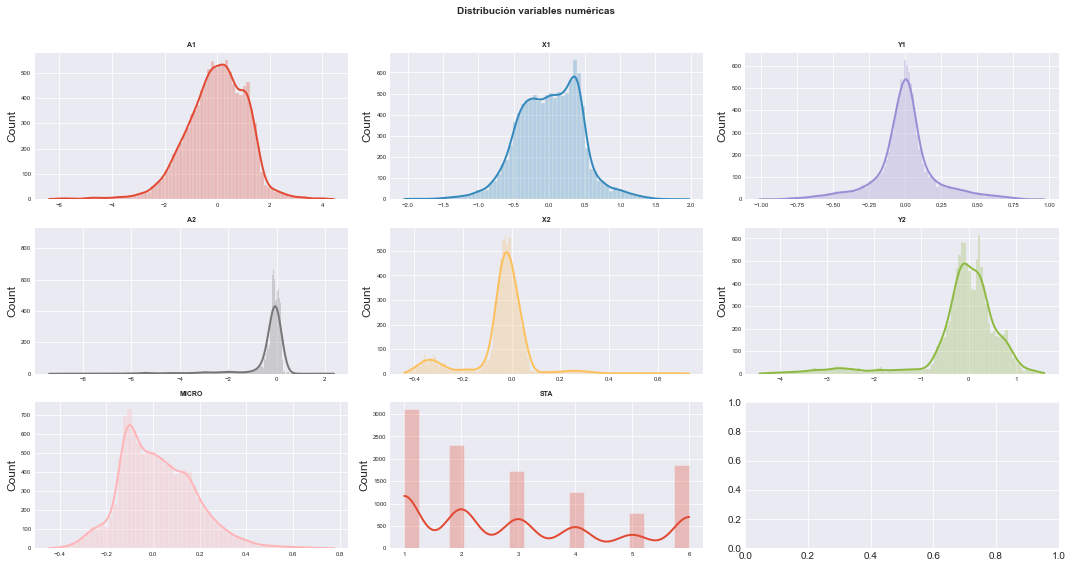

In [565]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 8))
axes = axes.flat
columnas_numeric = df.select_dtypes(include=['float64', 'int']).columns
columnas_numeric = columnas_numeric.drop('TACH')

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = df,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 7, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    
    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 10, fontweight = "bold");

C:\Users\migue\AppData\Local\Temp/ipykernel_12052/1566143455.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df.drop(['STATUS'],1).hist()


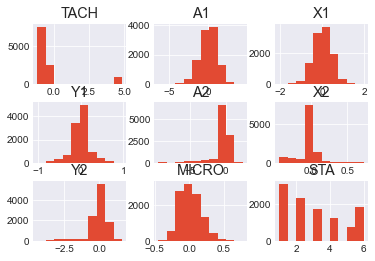

In [563]:
df.drop(['STATUS'],1).hist()
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


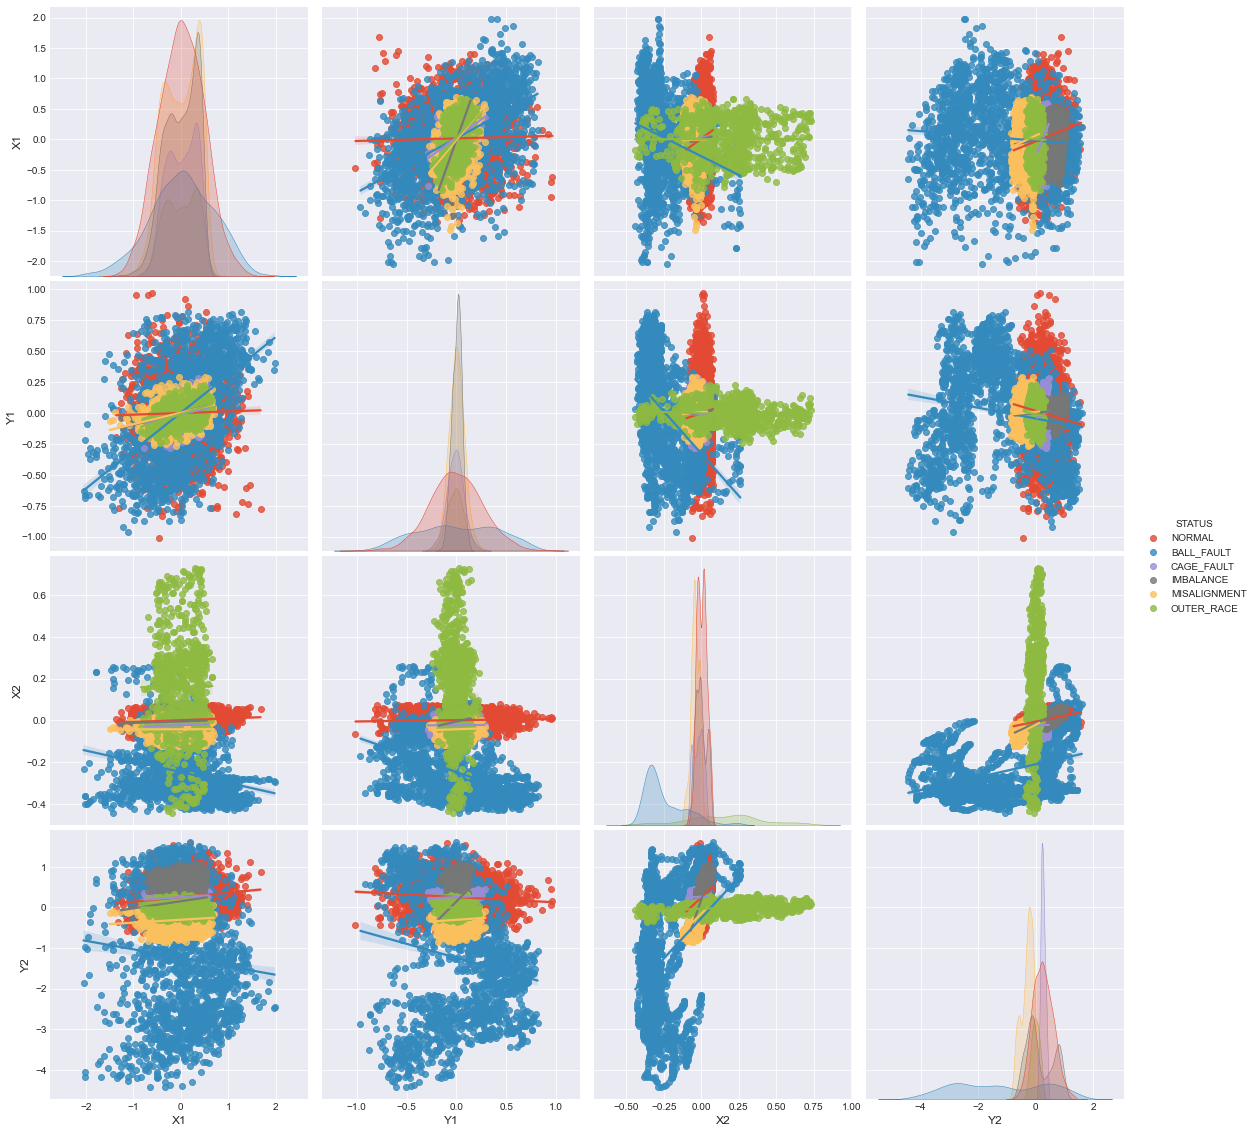

In [567]:
sns.pairplot(df.dropna(), hue='STATUS',size=4,vars=["X1","Y1","X2","Y2"],kind='reg')

<Figure size 432x288 with 0 Axes>

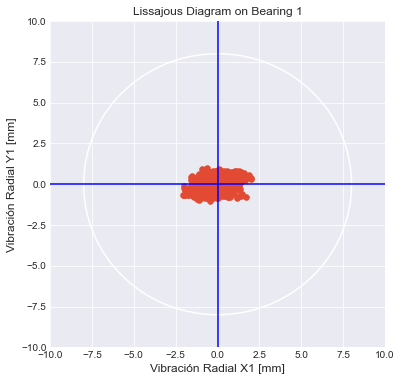

<Figure size 432x288 with 0 Axes>

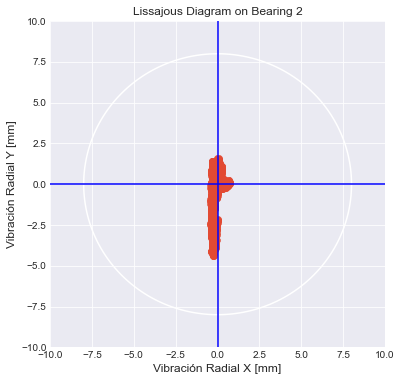

In [541]:
# Graficando las variables de interes
axis_diameter = 16
X1max = max(df.X1)
Y1max = max(df.Y1)

#Figura No. 1 - Lissajous Diagram on Bearing 1
plt.figure(1)
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x,y)
F = X**2 + Y**2 - (axis_diameter/2)**2

fig, ax = plt.subplots()

ax.contour(X,Y,F,[0])
plt.scatter(df['X1'], df['Y1'])
plt.title('Lissajous Diagram on Bearing 1', fontsize=12)
plt.xlabel('Vibración Radial X1 [mm]')
plt.ylabel('Vibración Radial Y1 [mm]')
plt.axvline(0, color='b')
plt.axhline(0, color='b', xmax=5)
plt.xlim(-10,10)
plt.ylim(-10,10)
fig.set_figheight(6)
fig.set_figwidth(6)
plt.show()

#Figura No. 2 - Lissajous Diagram on Bearing 2
plt.figure(2)
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x,y)
F = X**2 + Y**2 - (axis_diameter/2)**2

fig, ax = plt.subplots()

ax.contour(X,Y,F,[0])
plt.scatter(df['X2'], df['Y2'])
plt.title('Lissajous Diagram on Bearing 2', fontsize=12)
plt.xlabel('Vibración Radial X [mm]')
plt.ylabel('Vibración Radial Y [mm]')
plt.axvline(0, color='b')
plt.axhline(0, color='b', xmax=5)
plt.xlim(-10,10)
plt.ylim(-10,10)
fig.set_figheight(6)
fig.set_figwidth(6)
plt.show()

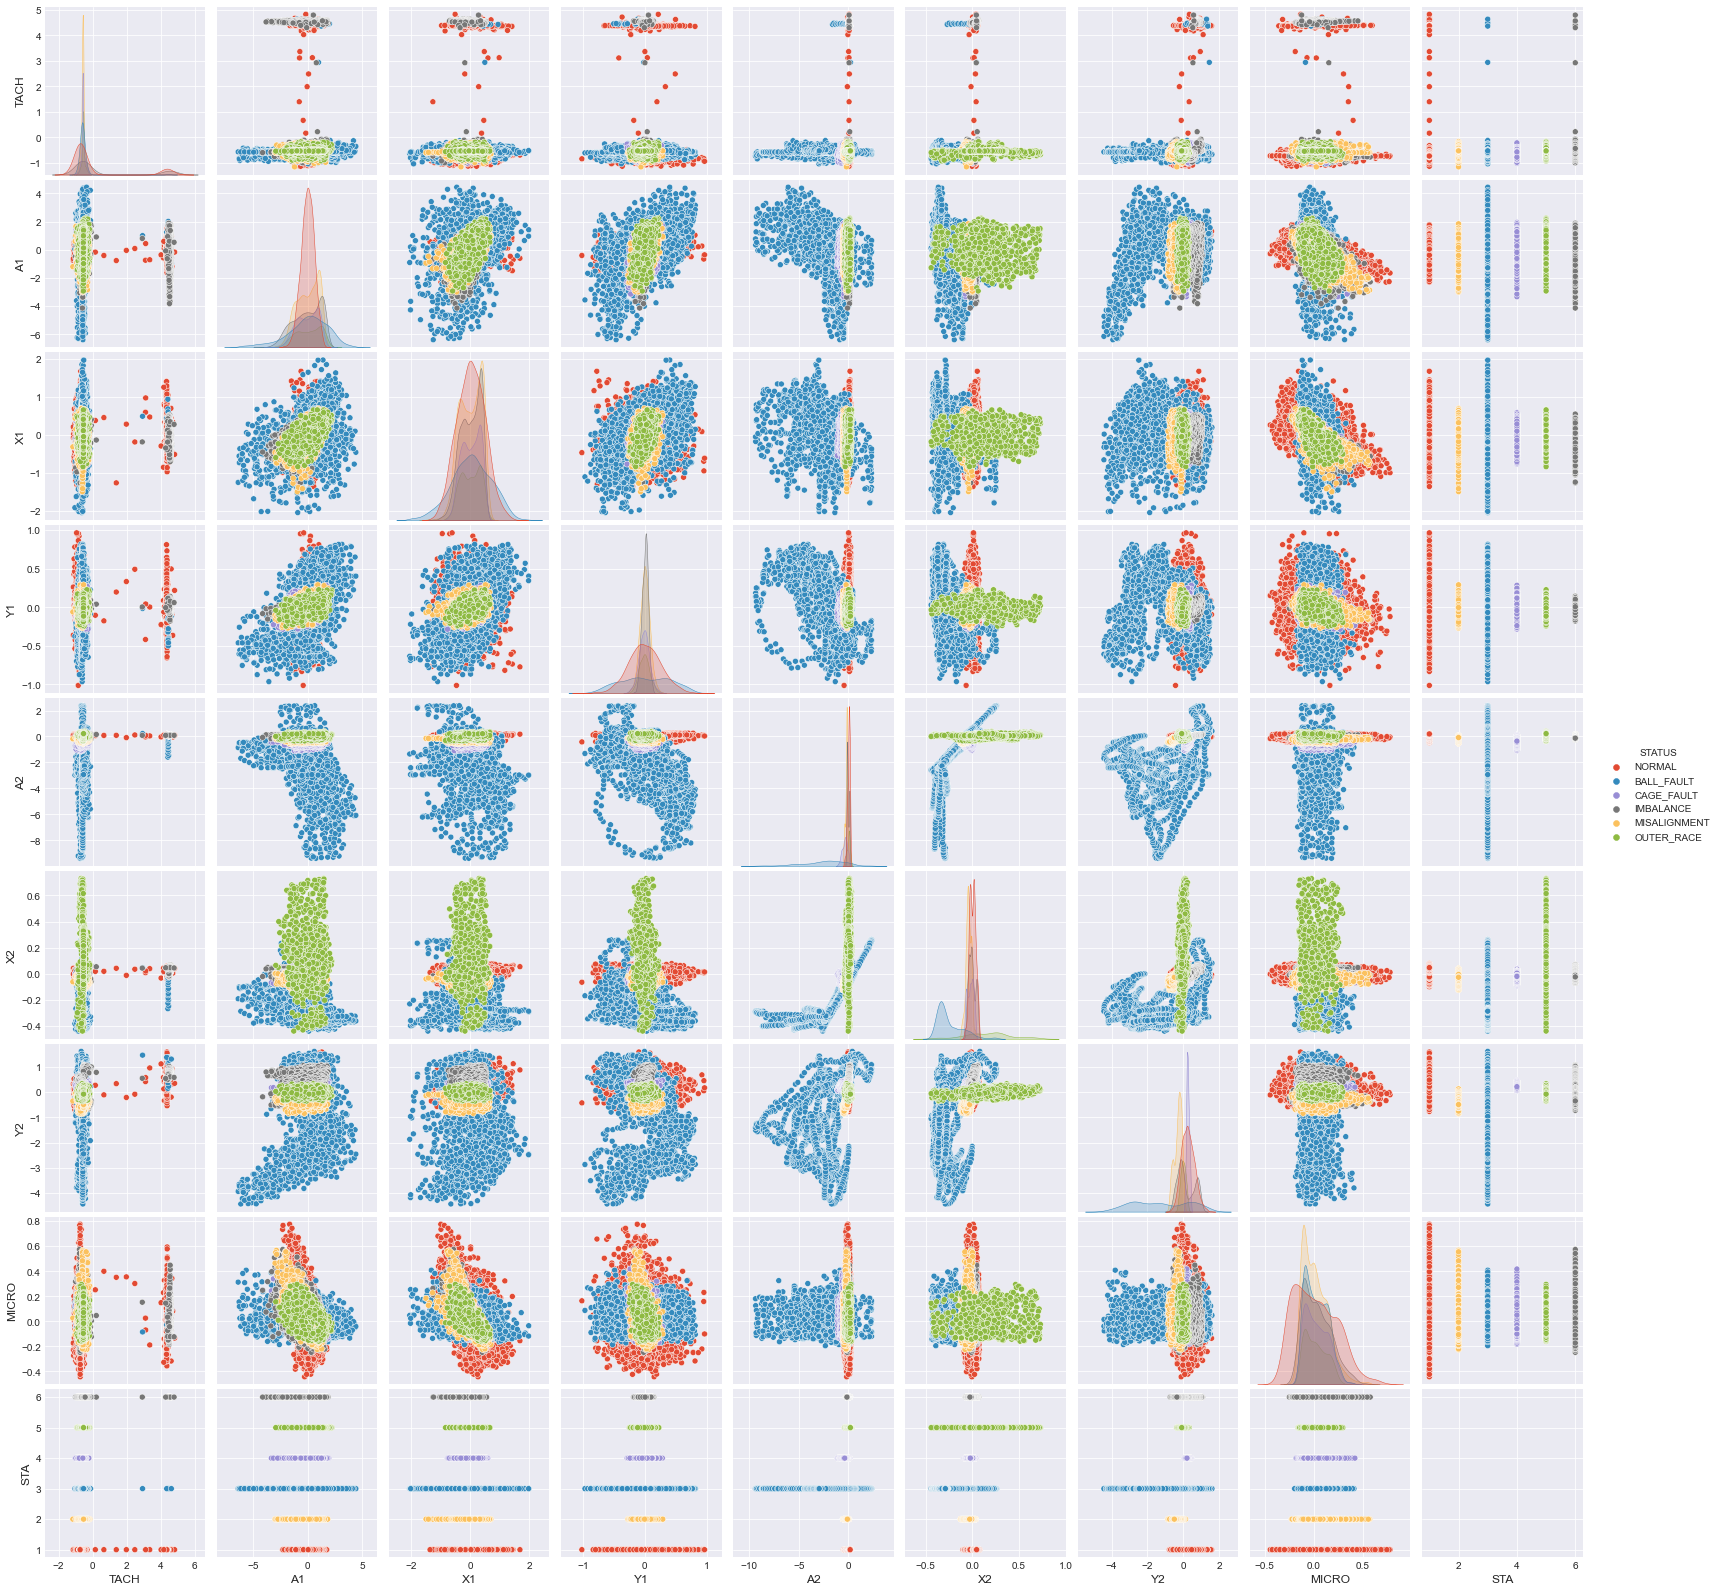

In [542]:
sns.pairplot(df, hue="STATUS");

# Modelo PCA - Exploración inicial

Los dos principales aspectos a tener en cuenta cuando se quiere realizar un PCA es identificar el valor promedio y dispersión de las variables. El dataset seeccionado y en análisis, establece las vibraciones en los compoenentes X y Y sobre los cojinetes 1 y 2.

In [544]:
print('----------------------')
print('Media de cada variable')
print('----------------------')
df.mean(axis=0)

----------------------
Media de cada variable
----------------------


C:\Users\migue\AppData\Local\Temp/ipykernel_12052/927365533.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean(axis=0)


TACH    -0.209156
A1      -0.031596
X1       0.008461
Y1      -0.000832
A2      -0.470275
X2      -0.038809
Y2      -0.135370
MICRO    0.020390
STA      2.990432
dtype: float64

La media de las variables observadas en el dataset muestran que la desviación mas real de los datos tomados es la de la desviación en el axial **A2**, al igual que el dato que representa la componente Y del cojinete 2 denominada **Y2**

In [545]:
print('-------------------------')
print('Varianza de cada variable')
print('-------------------------')
df.var(axis=0)

-------------------------
Varianza de cada variable
-------------------------


C:\Users\migue\AppData\Local\Temp/ipykernel_12052/792892493.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.var(axis=0)


TACH     1.934163
A1       1.365837
X1       0.200542
Y1       0.047094
A2       1.577354
X2       0.018631
Y2       0.743065
MICRO    0.025260
STA      3.245982
dtype: float64

La varianza es muy distinta entre las variables, teniendo en cuenta el valor de la media aceptada sobre los valores de A1 y A2, se evidencia que la varianza sobre las vibraciones en el compresor, específicamente sobre las componentes axiales **A1 del cojinete 1** y **A2 del cojinete 2**, pueden ser analizadas en esta sesion.

Si no se estandarizan las variables para que tengan media cero y desviación estándar de uno antes de realizar el estudio PCA, la variable A2, que tiene una media y dispersión muy superior al resto, dominará la mayoría de las componentes principales.

In [548]:
datos = df.loc[:, ['TACH','A1','X1','Y1','A2','X2','Y2']]
datos.head(5)

,TACH,A1,X1,Y1,A2,X2,Y2
0,-0.72765,0.644480,-0.084422,-0.314860,-0.060899,-0.054569,-0.18197
1,-0.57830,0.510760,0.642070,-0.260530,-0.052479,-0.047035,-0.18477
2,-0.77031,0.375470,-0.193580,-0.082256,-0.056731,-0.049114,-0.38200
3,-0.62511,0.210260,0.519490,0.124550,-0.044920,-0.044307,-0.38912
4,-0.74069,0.043898,-0.311290,0.093263,-0.051291,-0.046124,-0.36207


## Modelo PCA

La clase sklearn.decomposition.PCA incorpora las principales funcionalidades que se necesitan a la hora de trabajar con modelos PCA. El argumento n_components determina el número de componentes calculados. Si se indica None, se calculan todas las posibles (min(filas, columnas) - 1).

Por defecto, PCA() centra los valores pero no los escala. Esto es importante ya que, si las variables tienen distinta dispersión, como en este caso, es necesario escalarlas. Una forma de hacerlo es combinar un StandardScaler() y un PCA() dentro de un pipeline.

In [550]:
# Entrenamiento modelo PCA con escalado de los datos
# ==============================================================================
pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(datos)

# Se extrae el modelo entrenado del pipeline
modelo_pca = pca_pipe.named_steps['pca']

Una vez entrenado el objeto PCA, pude accederse a toda la información de las componentes creadas.

components_ contiene el valor de los loadings  ϕ  que definen cada componente (eigenvector). Las filas se corresponden con las componentes principals (ordenadas de mayor a menor varianza explicada). Las filas se corresponden con las variables de entrada.

In [552]:
# Se combierte el array a dataframe para añadir nombres a los ejes.
pd.DataFrame(
    data    = modelo_pca.components_,
    columns = datos.columns,
    index   = ['PC1', 'PC2', 'PC3','PC4', 'PC5', 'PC6', 'PC7']
)

,TACH,A1,X1,Y1,A2,X2,Y2
PC1,-0.142892,0.225768,0.213558,0.318321,-0.566210,-0.520166,-0.436473
PC2,-0.281512,-0.568212,-0.518324,-0.377755,-0.088453,-0.208329,-0.367835
PC3,0.929235,-0.197367,-0.046138,-0.127096,-0.158991,-0.228349,-0.043182
PC4,0.085408,-0.158103,-0.546954,0.804441,-0.001195,0.139334,0.044826
PC5,-0.045977,0.496241,-0.539441,-0.241222,-0.244469,-0.297839,0.503958
PC6,0.162200,0.526250,-0.296911,-0.159007,0.030708,0.449001,-0.617063
PC7,-0.033734,-0.197531,0.072757,-0.096033,-0.765241,0.569350,0.188611


Analizar con detalle el vector de carga que forma cada componente puede ayudar a interpretar qué tipo de información recoge cada una de ellas. Por ejemplo, la primera componente es el resultado de la siguiente combinación lineal de las variables originales:

**Estandarizar los datos**

La PCA se efectúa por escala, por lo que debe escalar las características de los datos antes de aplicar la PCA. Al usar **StandardScaler** para estandarizar las características del conjunto de datos en una escala unitaria (media = 0 y varianza = 1), se obtiene un requisito para el rendimiento óptimo de muchos algoritmos de aprendizaje automático.

Se tiene entonces el resultado como una ecuación respecto a las vibraciones para PC1:

### PC1 = - 0.14 TACH + 0.22 A1 + 0.21 X1 + 0.31 Y1 - 0.56 A2 - 0.52 X2 - 0.43 Y2

Los pesos asignados al esquema de la medición de vibración establece que en la variable de la componente Y del primer cojinete es mayor al componente X para el segundo cojinete.

La influencia de las variables en cada componente analizarse visualmente con un gráfico de tipo heatmap.

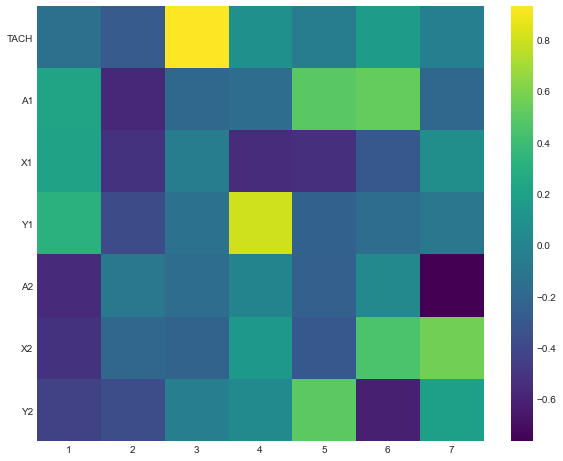

In [568]:
# Heatmap componentes
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 8))
componentes = modelo_pca.components_
plt.imshow(componentes.T, cmap='viridis', aspect='auto')
plt.yticks(range(len(datos.columns)), datos.columns)
plt.xticks(range(len(datos.columns)), np.arange(modelo_pca.n_components_) + 1)
plt.grid(False)
plt.colorbar();

Una vez calculadas las componentes principales, se puede conocer la varianza explicada por cada una de ellas, la proporción respecto al total y la proporción de varianza acumulada. Esta información está almacenada en los atributos explained_variance_ y explained_variance_ratio_ del modelo.

----------------------------------------------------
Porcentaje de varianza explicada por cada componente
----------------------------------------------------
[0.34164174 0.24741094 0.13198684 0.09873964 0.09021636 0.05138332
 0.03862117]


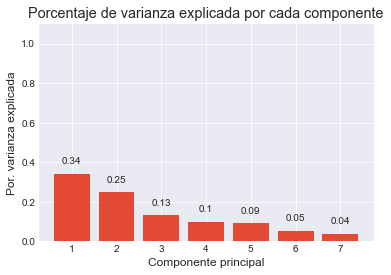

In [556]:
# Porcentaje de varianza explicada por cada componente
# ==============================================================================
print('----------------------------------------------------')
print('Porcentaje de varianza explicada por cada componente')
print('----------------------------------------------------')
print(modelo_pca.explained_variance_ratio_)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.bar(
    x      = np.arange(modelo_pca.n_components_) + 1,
    height = modelo_pca.explained_variance_ratio_
)

for x, y in zip(np.arange(len(datos.columns)) + 1, modelo_pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada');

En este caso, la primera componente explica el 41% de la varianza observada en los datos.

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.34164174 0.58905268 0.72103952 0.81977916 0.90999552 0.96137883
 1.        ]


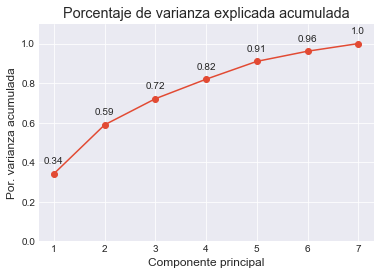

In [557]:
# Porcentaje de varianza explicada acumulada
# ==============================================================================
prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.plot(
    np.arange(len(datos.columns)) + 1,
    prop_varianza_acum,
    marker = 'o'
)

for x, y in zip(np.arange(len(datos.columns)) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
    
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada');

# Clasificación

In [558]:
# Importaremos la mayoria de modulos que se utilizaran a lo largo de la práctica

# Modulos basicos
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-darkgrid')

# Modulos de scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, precision_score, accuracy_score
from sklearn.metrics import  roc_auc_score, roc_curve
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [559]:
# Funcion para calcular y visualizar la matriz de confusion 
def plotCM(ytrue, ypred, clases=None, normalize = False, ax = None):
    """ Funcion para calcular y visualizar la matriz de confusion"""
    
    if clases == None:
        clases = list(set(ytrue))
        clases.sort() # etiquetas unicas ordenadas alfabeticamente
    
    CM = confusion_matrix(ytrue,ypred, labels=clases)
    
    #Normaliza la matriz de confusion dividiendo cada fila por el total de verdaderos
    if normalize:
        CM = 100*CM / CM.sum(axis=1).reshape(-1,1) #Aprovechando el Broadcasting!
 
    df = pd.DataFrame(CM, index=clases, columns=clases)
    df.index.name = 'True'; df.columns.name = 'Predicted'
    
    sns.heatmap( df, # Visualizando la matriz de confusion
             annot=True, fmt='2.1f', cmap='ocean_r',cbar=False,square=True, annot_kws={'fontsize':16}, ax=ax )
    
    plt.show()

## Crear un modelo

A continuación se organizará el dataset teniendo en cuenta de las variables tomadas, los valores que no presentan posiblemente una falla de la instumentación o del canal de sistema de monitoreo.

In [560]:
#X = datos_vibracion.loc[:,'Y1':'X2']
X = df.loc[:,'A1':'Y2']
y = df['STATUS']

# Dividiendo en training y test
idx_train = df['X1'].values < -0.5  #Este es el valor de vibración alta que puede considerarse en el ejercicio
X_train = X[idx_train]
X_test = X[~idx_train]
y_train = y[idx_train]
y_test = y[~idx_train]

# 5. Solucionar un problema de regresión y/o clasificación, de una o varias variables de salida empleando diferentes modelos. <a class="anchor" id="cinco">

Entre los modelos se pueden trabajar :

* Regresión lineal/ logística con y sin regularización
* Discriminantes (lineal y cuadrático)
* K-nearest-neighbour
* Redes neuronales artificiales (MLP)
* Naive Bayes Classifier
* Random Forest
* Bagging Regressors/Classifiers
* Gradient Boosted Machines
* Support Vector Machines.

Se debe solucionar el problema encontrando el mejor modelo posible, usando validación cruzada, entre varios tipos de modelos y varias configuraciones de hiperparámetros, involucrando diferentes pipelines (normalización, técnicas de reducción de la dimensión, selección de descriptores, y modelos de regresión/clasificaci´on). Al final, se deben evaluar los mejores modelos en un conjunto de prueba independiente.

## Regresión Lineal

La regresión lineal es un método estadístico que trata de modelar la relación entre una variable continua y una o más variables independientes mediante el ajuste de una ecuación lineal. Se llama regresión lineal simple cuando solo hay una variable independiente y regresión lineal múltiple cuando hay más de una. Dependiendo del contexto, a la variable modelada se le conoce como variable dependiente o variable respuesta, y a las variables independientes como regresores, predictores o features.

In [569]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

**Representación gráfica** El primer paso antes de generar un modelo de regresión simple es representar los datos para poder intuir si existe una relación y cuantificar dicha relación mediante un coeficiente de correlación.

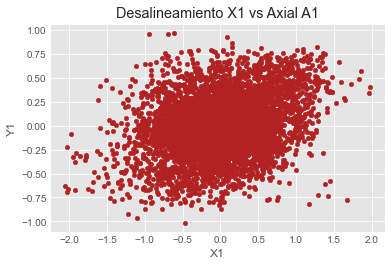

In [594]:
# Gráfico
# ==============================================================================
fig, ax = plt.subplots(figsize=(6, 3.84))

datos.plot(
    x    = 'X1',
    y    = 'Y1',
    c    = 'firebrick',
    kind = "scatter",
    ax   = ax
)
ax.set_title('Desalineamiento X1 vs Axial A1');

In [595]:
# Correlación lineal entre las dos variables
# ==============================================================================
corr_test = pearsonr(x = df['X1'], y =  df['Y1'])
print("Coeficiente de correlación de Pearson: ", corr_test[0])
print("P-value: ", corr_test[1])

Coeficiente de correlación de Pearson:  0.30024711784998304
P-value:  1.4470711712024734e-229


El gráfico y el test de correlación muestran una relación lineal, de intensidad considerable (r = 0.30) y significativa (p-value = APROX 0.0). Tiene sentido intentar generar un modelo de regresión lineal con el objetivo de predecir EL IMPACTO DE UNA VIBRACIÓN AXIAL DEL EJE DE LA MAQUINARIA CON LA VIBRACIÓN RADIAL EN EL PRIMER COJINETE.

**Ajuste del modelo** Se ajusta un modelo empleando como variable respuesta X1 y como predictor A1. Como en todo estudio predictivo, no solo es importante ajustar el modelo, sino también cuantificar su capacidad para predecir nuevas observaciones. Para poder hacer esta evaluación, se dividen los datos en dos grupos, uno de entrenamiento y otro de test.

### Scikit-learn

In [596]:
# División de los datos en train y test
# ==============================================================================
X = datos[['X1']]
y = datos['Y1']

X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1),
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

# Creación del modelo
# ==============================================================================
modelo = LinearRegression()
modelo.fit(X = X_train.reshape(-1, 1), y = y_train)

LinearRegression()

In [597]:
# Información del modelo
# ==============================================================================
print("Intercept:", modelo.intercept_)
print("Coeficiente:", list(zip(X.columns, modelo.coef_.flatten(), )))
print("Coeficiente de determinación R^2:", modelo.score(X, y))

Intercept: [-0.00267577]
Coeficiente: [('X1', 0.14679739112918797)]
Coeficiente de determinación R^2: 0.09013345637512793


Una vez entrenado el modelo, se evalúa la capacidad predictiva empleando el conjunto de test.

In [598]:
# Error de test del modelo 
# ==============================================================================
predicciones = modelo.predict(X = X_test)
print(predicciones[0:3,])

rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print("")
print(f"El error (rmse) de test es: {rmse}")

[[ 0.16697798]
 [-0.09716337]
 [-0.05205107]]

El error (rmse) de test es: 0.20608416671628793


### Statsmodels

La implementación de regresión lineal de Statsmodels, es más completa que la de Scikitlearn ya que, además de ajustar el modelo, permite calcular los test estadísticos y análisis necesarios para verificar que se cumplen las condiciones sobre las que se basa este tipo de modelos. Statsmodels tiene dos formas de entrenar el modelo:

Indicando la fórmula del modelo y pasando los datos de entrenamiento como un dataframe que incluye la variable respuesta y los predictores.

Pasar dos matrices, una con los predictores y otra con la variable respuesta. Esta es igual a la empleada por Scikitlearn con la diferencia de que a la matriz de predictores hay que añadirle una primera columna de 1s.

In [599]:
# División de los datos en train y test
# ==============================================================================
X = datos[['X1']]
y = datos['Y2']

X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1),
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [600]:
# Creación del modelo utilizando matrices como en scikitlearn
# ==============================================================================
# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     4.487
Date:                Sat, 13 Nov 2021   Prob (F-statistic):             0.0342
Time:                        02:33:27   Log-Likelihood:                -11304.
No. Observations:                8863   AIC:                         2.261e+04
Df Residuals:                    8861   BIC:                         2.263e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1384      0.009    -15.037      0.0

### Intervalos de confianza de los coeficientes

In [601]:
# Intervalos de confianza para los coeficientes del modelo
# ==============================================================================
modelo.conf_int(alpha=0.05)

array([[-0.15646662, -0.12037668],
       [-0.08403408, -0.00325371]])

### Predicciones

Una vez entrenado el modelo, se pueden obtener predicciones para nuevos datos. Los modelos de statsmodels permiten calcular las predicciones de dos formas:

* predict(): devuelve únicamente el valor de las predicciones.

* get_prediction().summary_frame(): devuelve, además de las predicciones, los intervalos de confianza asociados.

In [602]:
# Predicciones con intervalo de confianza del 95%
# ==============================================================================
predicciones = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predicciones.head(4)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,-0.148510,0.010272,-0.168645,-0.128375,-1.847042,1.550022
1,-0.159544,0.013423,-0.185856,-0.133232,-1.858160,1.539073
2,-0.127205,0.010720,-0.148218,-0.106192,-1.825748,1.571337
3,-0.132181,0.009727,-0.151247,-0.113115,-1.830701,1.566339


### Representación gráfica del modelo


Además de la línea de mínimos cuadrados, es recomendable incluir los límites superior e inferior del intervalo de confianza. Esto permite identificar la región en la que, según el modelo generado y para un determinado nivel de confianza, se encuentra el valor promedio de la variable respuesta.

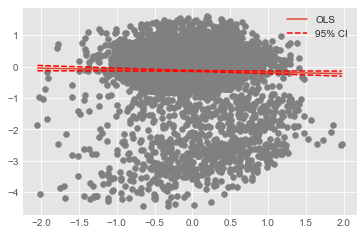

In [603]:
# Predicciones con intervalo de confianza del 95%
# ==============================================================================
predicciones = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predicciones['x'] = X_train[:, 1]
predicciones['y'] = y_train
predicciones = predicciones.sort_values('x')

# Gráfico del modelo
# ==============================================================================
fig, ax = plt.subplots(figsize=(6, 3.84))

ax.scatter(predicciones['x'], predicciones['y'], marker='o', color = "gray")
ax.plot(predicciones['x'], predicciones["mean"], linestyle='-', label="OLS")
ax.plot(predicciones['x'], predicciones["mean_ci_lower"], linestyle='--', color='red', label="95% CI")
ax.plot(predicciones['x'], predicciones["mean_ci_upper"], linestyle='--', color='red')
ax.fill_between(predicciones['x'], predicciones["mean_ci_lower"], predicciones["mean_ci_upper"], alpha=0.1)
ax.legend();

In [604]:
# Error de test del modelo 
# ==============================================================================
X_test = sm.add_constant(X_test, prepend=True)
predicciones = modelo.predict(exog = X_test)
rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print("")
print(f"El error (rmse) de test es: {rmse}")


El error (rmse) de test es: 0.8444743740229254


---

## Regresión Lineal Múltiple

In [605]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
from scipy import stats

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

### Relación entre variables

El primer paso a la hora de establecer un modelo lineal múltiple es estudiar la relación que existe entre variables. Esta información es crítica a la hora de identificar cuáles pueden ser los mejores predictores para el modelo, y para detectar colinealidad entre predictores. A modo complementario, es recomendable representar la distribución de cada variable mediante histogramas.

In [606]:
# Correlación entre columnas numéricas
# ==============================================================================

def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matriz de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)



corr_matrix = datos.select_dtypes(include=['float64', 'int']).corr(method='pearson')
tidy_corr_matrix(corr_matrix).head(10)

,variable_1,variable_2,r,abs_r
39,X2,A2,0.702845,0.702845
33,A2,X2,0.702845,0.702845
46,Y2,A2,0.530038,0.530038
34,A2,Y2,0.530038,0.530038
47,Y2,X2,0.523690,0.523690
41,X2,Y2,0.523690,0.523690
15,X1,A1,0.464419,0.464419
9,A1,X1,0.464419,0.464419
10,A1,Y1,0.378313,0.378313
22,Y1,A1,0.378313,0.378313


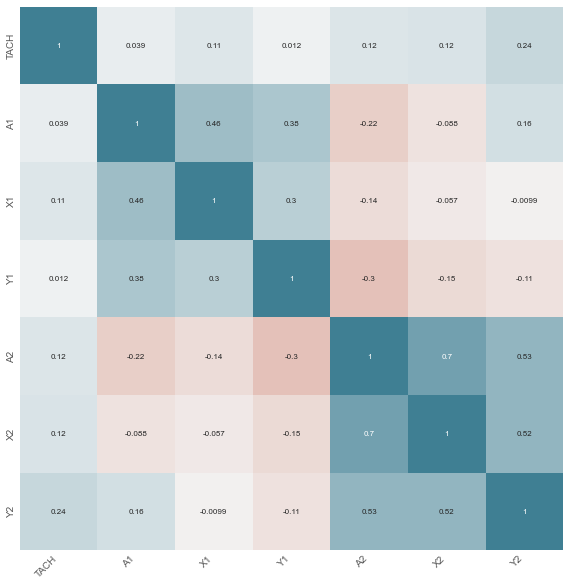

In [608]:
# Heatmap matriz de correlaciones
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 8},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 10)

### Ajuste del modelo

Se ajusta un modelo lineal múltiple con el objetivo de predecir la vibración axial A2 en función de la vibración radial X2.

In [611]:
# División de los datos en train y test
# ==============================================================================
X = df[['X2', 'Y2', 'A2']]
y = df['A2']

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [612]:
# Creación del modelo utilizando matrices como en scikitlearn
# ==============================================================================
# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.691e+34
Date:                Sat, 13 Nov 2021   Prob (F-statistic):               0.00
Time:                        02:47:50   Log-Likelihood:             2.9925e+05
No. Observations:                8863   AIC:                        -5.985e+05
Df Residuals:                    8859   BIC:                        -5.985e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.318e-16   5.97e-18     55.583      0.0

El modelo con todas las variables introducidas como predictores tiene un  R2  alto (1.0), es capaz de explicar el 100% de la variabilidad observada en la vibración axial del eje en el cojinete 2. El p-value del modelo es significativo (0) por lo que se puede aceptar que el modelo es mejor que lo esperado es por azar, al menos uno de los coeficientes parciales de regresión es distinto de 0.

### Intervalos de confianza de los coeficientes

In [613]:
# Intervalos de confianza para los coeficientes del modelo
# ==============================================================================
intervalos_ci = modelo.conf_int(alpha=0.05)
intervalos_ci.columns = ['2.5%', '97.5%']
intervalos_ci

,2.5%,97.5%
const,3.200655e-16,3.434662e-16
X2,3.549661e-15,3.777811e-15
Y2,-7.259193e-17,-4.189982e-17
A2,1.000000e+00,1.000000e+00


In [614]:
# Diagnóstico errores (residuos) de las predicciones de entrenamiento
# ==============================================================================
y_train = y_train.flatten()
prediccion_train = modelo.predict(exog = X_train)
residuos_train   = prediccion_train - y_train

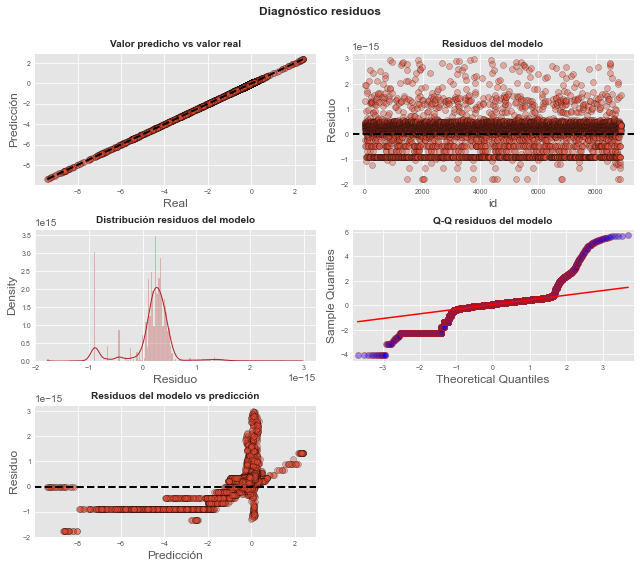

In [615]:
# Gráficos
# ==============================================================================
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(9, 8))

axes[0, 0].scatter(y_train, prediccion_train, edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],
                'k--', color = 'black', lw=2)
axes[0, 0].set_title('Valor predicho vs valor real', fontsize = 10, fontweight = "bold")
axes[0, 0].set_xlabel('Real')
axes[0, 0].set_ylabel('Predicción')
axes[0, 0].tick_params(labelsize = 7)

axes[0, 1].scatter(list(range(len(y_train))), residuos_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[0, 1].set_title('Residuos del modelo', fontsize = 10, fontweight = "bold")
axes[0, 1].set_xlabel('id')
axes[0, 1].set_ylabel('Residuo')
axes[0, 1].tick_params(labelsize = 7)

sns.histplot(
    data    = residuos_train,
    stat    = "density",
    kde     = True,
    line_kws= {'linewidth': 1},
    color   = "firebrick",
    alpha   = 0.3,
    ax      = axes[1, 0]
)

axes[1, 0].set_title('Distribución residuos del modelo', fontsize = 10,
                     fontweight = "bold")
axes[1, 0].set_xlabel("Residuo")
axes[1, 0].tick_params(labelsize = 7)


sm.qqplot(
    residuos_train,
    fit   = True,
    line  = 'q',
    ax    = axes[1, 1], 
    color = 'firebrick',
    alpha = 0.4,
    lw    = 2
)
axes[1, 1].set_title('Q-Q residuos del modelo', fontsize = 10, fontweight = "bold")
axes[1, 1].tick_params(labelsize = 7)

axes[2, 0].scatter(prediccion_train, residuos_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[2, 0].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[2, 0].set_title('Residuos del modelo vs predicción', fontsize = 10, fontweight = "bold")
axes[2, 0].set_xlabel('Predicción')
axes[2, 0].set_ylabel('Residuo')
axes[2, 0].tick_params(labelsize = 7)

# Se eliminan los axes vacíos
fig.delaxes(axes[2,1])

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Diagnóstico residuos', fontsize = 12, fontweight = "bold");

Los residuos no parecen distribuirse de forma aleatoria en torno a cero, sin mantener aproximadamente la misma variabilidad a lo largo del eje X. Este patrón apunta a una falta de homocedasticidad y de distribución normal.

## Regresión logística

La regresión logística es un método estadístico que trata de modelar la probabilidad de una variable cualitativa binaria (dos posibles valores) en función de una o más variables independientes. La principal aplicación de la regresión logística es la creación de modelos de clasificación binaria.

Se llama regresión logística simple cuando solo hay una variable independiente y regresión logística múltiple cuando hay más de una. Dependiendo del contexto, a la variable modelada se le conoce como variable dependiente o variable respuesta, y a las variables independientes como regresores, predictores o features.

In [625]:
# Número de obsercaciones por clase
# ==============================================================================
df.STATUS.value_counts().sort_index()

BALL_FAULT      1734
CAGE_FAULT      1258
IMBALANCE       1861
MISALIGNMENT    2317
NORMAL          3112
OUTER_RACE       797
Name: STATUS, dtype: int64

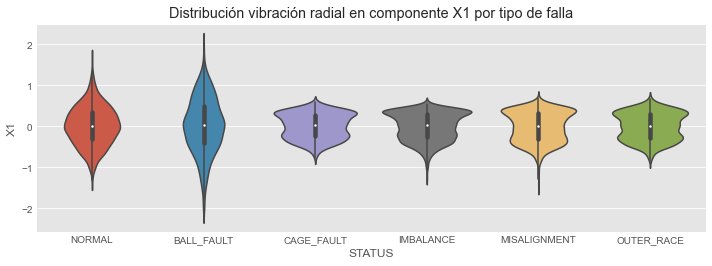

In [629]:
# Gráfico
# ==============================================================================
fig, ax = plt.subplots(figsize=(12, 3.84))

sns.violinplot(
        x     = 'STATUS',
        y     = 'X1',
        data  = df,
        #color = "white",
        ax    = ax
    )

ax.set_title('Distribución vibración radial en componente X1 por tipo de falla');

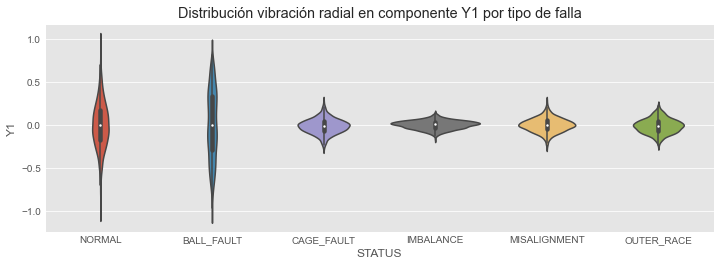

In [675]:
# Gráfico
# ==============================================================================
fig, ax = plt.subplots(figsize=(12, 3.84))

sns.violinplot(
        x     = 'STATUS',
        y     = 'Y1',
        data  = df,
        #color = "white",
        ax    = ax
    )

ax.set_title('Distribución vibración radial en componente Y1 por tipo de falla');

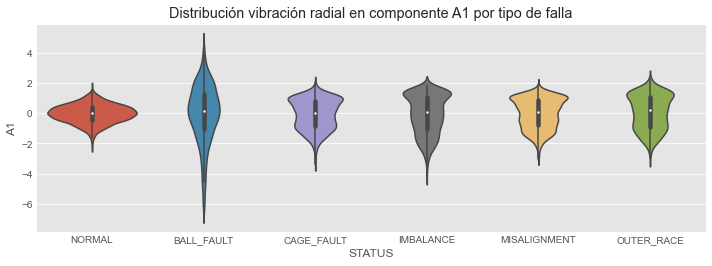

In [676]:
# Gráfico
# ==============================================================================
fig, ax = plt.subplots(figsize=(12, 3.84))

sns.violinplot(
        x     = 'STATUS',
        y     = 'A1',
        data  = df,
        #color = "white",
        ax    = ax
    )

ax.set_title('Distribución vibración radial en componente A1 por tipo de falla');

In [630]:
lrmodel = LogisticRegression(solver='lbfgs')
lrmodel.fit(X_train,y_train)

LogisticRegression()

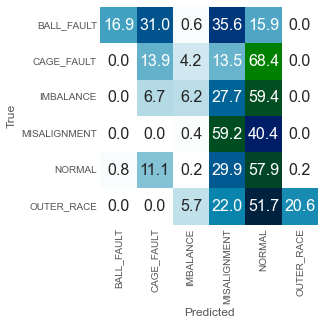

In [631]:
# Matriz de confusion sobre el test
y_pred = lrmodel.predict(X_test)
plotCM(y_test, y_pred, normalize=True)

In [632]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

  BALL_FAULT       0.92      0.17      0.29      1369
  CAGE_FAULT       0.17      0.14      0.15      1207
   IMBALANCE       0.48      0.06      0.11      1720
MISALIGNMENT       0.37      0.59      0.46      2084
      NORMAL       0.32      0.58      0.41      2645
  OUTER_RACE       0.96      0.21      0.34       756

    accuracy                           0.35      9781
   macro avg       0.54      0.29      0.29      9781
weighted avg       0.47      0.35      0.31      9781



## Preprocesamiento

A continuación se realizará un preprocesamiento para obtener un conjunto de datos final que sea de calidad y útil para la fase de extracción de conocimiento.

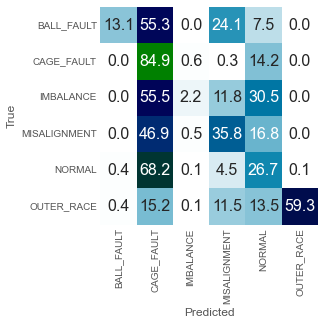

In [633]:
# Se instancia al objeto StandarScaler para realizar el ajuste
# Esto es muy adecuado para preprocesar de la misma forma al test
scaler = preprocessing.StandardScaler().fit(X_train)

# Regresion logistica como antes pero escalando los predictores
lrmodel = LogisticRegression(solver='lbfgs')
lrmodel.fit( scaler.transform(X_train),y_train )

# Prediccion pero escalando los predictores
y_pred = lrmodel.predict( scaler.transform(X_test) )

# matriz de confusion sin normalizacion
plotCM(y_test,y_pred, normalize=True)

In [634]:
# Test error
print("El accuracy del test es: {:.2f}".format( accuracy_score(y_test,y_pred) ))
test_error = 1-accuracy_score(y_test,y_pred)
print("El error del test es: {:.2f}".format( test_error ) )

El accuracy del test es: 0.32
El error del test es: 0.68


### Feature selection
Se puede realizar una selección de predictores, o llamado en inglés, *feature selection*. EPor ejemplo, el *p-value* al realizar una clasificación de regresión logística, es inverso a la relevancia del predictor. `scikit-learn` tiene el módulo [*sklearn.feature_selection*](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_selection), el cuál tiene diversos métodos implementados para selección de descriptores. 

A continuación usaremos uno de los más simples, `sklearn.feature_selection.f_classif(X, y)` que realiza un análisis ANOVA con la estadística F (retornando también p-values) de cada predictor, respecto a las clases.

Una explicación rápida e intuitiva de la estadística F podéis encontrarla en este [link](https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/f-statistic-value-test/)

In [635]:
from sklearn import feature_selection

F,p = feature_selection.f_classif(X_train, y_train)

# Crea un dataframe con los F-value y p-value para visualizar mejor
pd.DataFrame(np.array([F,p]).T,index=X_train.columns, columns=['F_value','p_value'])

,F_value,p_value
A1,27.410436,1.948520e-26
X1,61.679142,9.315413e-58
Y1,41.369030,1.398914e-39
A2,130.702805,3.496835e-112
X2,267.035846,3.453479e-196
Y2,89.456880,6.417588e-81


## Ingreso de límites de Vibración a analizar

In [637]:
print("El accuracy del test es: {:.2f}".format( accuracy_score(y_test,y_pred) ))

El accuracy del test es: 0.28


Como se puede ver, se evidencia una precisión en el análisis anteior, 

## Análisis discriminante lineal

Las probabilidades anteriores (prior probabilities) son:

In [639]:
lda_model.priors_

array([0.67613636, 0.02840909, 0.05113636, 0.24431818])

Las medias para cada clase por descriptor son:

In [640]:
lda_model.means_

array([[-0.27805095, -0.34541148],
       [ 0.57426533,  0.56691076],
       [ 0.12620181,  0.56342017],
       [ 0.67630046,  0.77206117]])

Los coeficientes del modelo LDA (con los datos preprocesados) son:

In [641]:
lda_model.coef_

array([[-0.30194784, -0.43008284],
       [ 0.63572921,  0.69613106],
       [ 0.10343109,  0.72859362],
       [ 0.74005271,  0.95678745]])

## Análisis de Vibraciones

Las probabilidades a priori son **π1 = 0.30** y **π2 = 0.7**; en otras palabras, el 30% de las observaciones de entrenamiento corresponden a la **característica de vibración en el cojinete 1 con valores mayores a +- 1.0 milímetros**. También proporciona las medias del grupo; es decir, el promedio de cada predictor dentro de cada clase, y el modelo de LDA los utiliza como estimaciones de μk. 

Esto sugiere que hay una tendencia a que los retornos de los 2 días anteriores sean negativos en los días en que el mercado aumenta, y una tendencia a que los retornos de los días anteriores sean positivos en los días en que el mercado declina. Los coeficientes de los discriminantes lineales proporcionan la combinación lineal de Lag1 y Lag2 que se utilizan para formar la regla de decisión del modelo LDA.
En otras palabras, estos multiplican a los predictores en X = x. Si -0.068×Lag1 - 0.055×Lag2 es grande, entonces el clasificador LDA predecirá un incremento en el mercado, y si es pequeño, entonces el clasificador LDA predecirá un declive en el mercado.

## KNN - K-Nearest Neighbors

K-Nearest Neighbor es uno de los algoritmos de machine learning más simples. Su funcionamiento es el siguiente: para predecir una observación se identifican las K observaciones del conjunto de entrenamiento que más se asemejan a ella (en base a sus predictores) y se emplea como valor predicho el promedio de la variable respuesta en dichas observaciones. Dada su sencillez, suele dar peores resultados que otros algoritmos, pero es un buen referente como baseline.

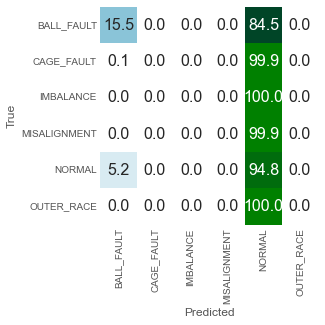

In [643]:
knn_model = KNeighborsClassifier(n_neighbors=3) #Instancia al modelo
knn_model.fit(X_train,y_train) # Ajuste del modelo
y_pred = knn_model.predict(X_test) # Prediccion
plotCM(y_test, y_pred,normalize=True) # Matriz de confusion

In [644]:
roc_auc_score(y_test=='NORMAL',y_pred=='NORMAL')

0.4899175195505501

## Gradient Boosting

Un modelo Gradient Boosting está formado por un conjunto de árboles de decisión individuales, entrenados de forma secuencial, de forma que cada nuevo árbol trata de mejorar los errores de los árboles anteriores. La predicción de una nueva observación se obtiene agregando las predicciones de todos los árboles individuales que forman el modelo.

Muchos métodos predictivos generan modelos globales en los que una única ecuación se aplica a todo el espacio muestral. Cuando el caso de uso implica múltiples predictores, que interaccionan entre ellos de forma compleja y no lineal, es muy difícil encontrar un único modelo global que sea capaz de reflejar la relación entre las variables. Los métodos estadísticos y de machine learning basados en árboles engloban a un conjunto de técnicas supervisadas no paramétricas que consiguen segmentar el espacio de los predictores en regiones simples, dentro de las cuales es más sencillo manejar las interacciones. Es esta característica la que les proporciona gran parte de su potencial.

In [646]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt

# Preprocesado y modelado
# ==============================================================================
from sklearn.datasets import load_boston
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid
from sklearn.inspection import permutation_importance
import multiprocessing

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('once')

In [647]:
df = pd.read_csv("./data/vibration.csv")

In [648]:
df.head()

,TACH,A1,X1,Y1,A2,X2,Y2,MICRO,STA,STATUS
0,-0.72765,0.644480,-0.084422,-0.314860,-0.060899,-0.054569,-0.18197,-0.018520,1,NORMAL
1,-0.57830,0.510760,0.642070,-0.260530,-0.052479,-0.047035,-0.18477,-0.117600,1,NORMAL
2,-0.77031,0.375470,-0.193580,-0.082256,-0.056731,-0.049114,-0.38200,0.081777,1,NORMAL
3,-0.62511,0.210260,0.519490,0.124550,-0.044920,-0.044307,-0.38912,-0.188030,1,NORMAL
4,-0.74069,0.043898,-0.311290,0.093263,-0.051291,-0.046124,-0.36207,0.108990,1,NORMAL


In [650]:
datos = df.loc[:,['TACH','A1','X1','Y1','A2','X2','Y2','STA']]

In [651]:
datos.head()

,TACH,A1,X1,Y1,A2,X2,Y2,STA
0,-0.72765,0.644480,-0.084422,-0.314860,-0.060899,-0.054569,-0.18197,1
1,-0.57830,0.510760,0.642070,-0.260530,-0.052479,-0.047035,-0.18477,1
2,-0.77031,0.375470,-0.193580,-0.082256,-0.056731,-0.049114,-0.38200,1
3,-0.62511,0.210260,0.519490,0.124550,-0.044920,-0.044307,-0.38912,1
4,-0.74069,0.043898,-0.311290,0.093263,-0.051291,-0.046124,-0.36207,1


Como en todo estudio predictivo, no solo es importante ajustar el modelo, sino también cuantificar su capacidad para predecir nuevas observaciones. Para poder hacer esta evaluación, se dividen los datos en dos grupos, uno de entrenamiento y otro de test.

In [652]:
# División de los datos en train y test
# ==============================================================================
X_train, X_test, y_train, y_test = train_test_split(
                                        datos.drop(columns = "X1"),
                                        datos['X1'],
                                        random_state = 123
                                    )
# Creación del modelo
# ==============================================================================
modelo = GradientBoostingRegressor(
            n_estimators = 10,
            loss         = 'ls',
            max_features = 'auto',
            random_state = 123
         )

# Entrenamiento del modelo
# ==============================================================================
modelo.fit(X_train, y_train)

GradientBoostingRegressor(max_features='auto', n_estimators=10,
                          random_state=123)

### Predicción y evaluación del modelo

Una vez entrenado el modelo, se evalúa la capacidad predictiva empleando el conjunto de test.

In [653]:
# Error de test del modelo inicial
# ==============================================================================
predicciones = modelo.predict(X = X_test)

rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print(f"El error (rmse) de test es: {rmse}")

El error (rmse) de test es: 0.3811053498970847


### Optimización de hiperparámetros

El modelo inicial se ha entrenado utilizando 10 árboles (n_estimators=10) y manteniendo el resto de hiperparámetros con su valor por defecto. Al ser hiperparámetros, no se puede saber de antemano cuál es el valor más adecuado, la forma de identificarlos es mediante el uso de estrategias de validación, por ejemplo validación cruzada.

Cabe tener en cuenta que, cuando se busca el valor óptimo de un hiperparámetro con dos métricas distintas, el resultado obtenido raramente es el mismo. Lo importante es que ambas métricas identifiquen las mismas regiones de interés.

### Número de árboles


En Gradient Boosting, el número de árboles es un hiperparámetro crítico en cuanto que, con forme se añaden árboles, se incrementa el riesgo de overfitting.

Valor óptimo de n_estimators: 476


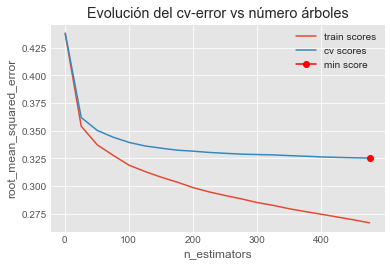

In [654]:
# Validación empleando k-cross-validation y neg_root_mean_squared_error
# ==============================================================================
train_scores = []
cv_scores    = []

# Valores evaluados
estimator_range = range(1, 500, 25)

# Bucle para entrenar un modelo con cada valor de n_estimators y extraer su error
# de entrenamiento y de k-cross-validation.
for n_estimators in estimator_range:
    
    modelo = GradientBoostingRegressor(
                n_estimators = n_estimators,
                loss         = 'ls',
                max_features = 'auto',
                random_state = 123
             )
    
    # Error de train
    modelo.fit(X_train, y_train)
    predicciones = modelo.predict(X = X_train)
    rmse = mean_squared_error(
            y_true  = y_train,
            y_pred  = predicciones,
            squared = False
           )
    train_scores.append(rmse)
    
    # Error de validación cruzada
    scores = cross_val_score(
                estimator = modelo,
                X         = X_train,
                y         = y_train,
                scoring   = 'neg_root_mean_squared_error',
                cv        = 5,
                n_jobs    = multiprocessing.cpu_count() - 1,
             )
    # Se agregan los scores de cross_val_score() y se pasa a positivo
    cv_scores.append(-1*scores.mean())
    
# Gráfico con la evolución de los errores
fig, ax = plt.subplots(figsize=(6, 3.84))
ax.plot(estimator_range, train_scores, label="train scores")
ax.plot(estimator_range, cv_scores, label="cv scores")
ax.plot(estimator_range[np.argmin(cv_scores)], min(cv_scores),
        marker='o', color = "red", label="min score")
ax.set_ylabel("root_mean_squared_error")
ax.set_xlabel("n_estimators")
ax.set_title("Evolución del cv-error vs número árboles")
plt.legend();
print(f"Valor óptimo de n_estimators: {estimator_range[np.argmin(cv_scores)]}")

### Learning rate


Junto con el número de árboles, el learning_rate es el hiperparámetro más importantes en Gradient Boosting, ya que es el que permite controlar cómo de rápido aprende el modelo y con ello el riesgo de llegar al overfitting. Estos dos hiperparámetros son interdependientes, cuanto menor es el learning rate, más árboles se necesitan para alcanzar buenos resultados pero menor es el riesgo de overfitting.

Los valores estimados por validación cruzada indican que, el mejor modelo se consigue con un learning rate de 0.1.

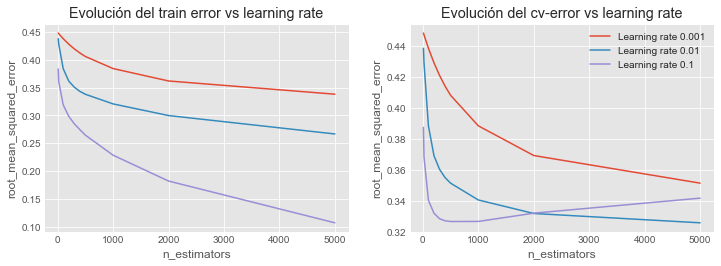

In [655]:
# Validación empleando k-cross-validation y neg_root_mean_squared_error
# ==============================================================================
resultados = {}

# Valores evaluados
learning_rates = [0.001, 0.01, 0.1]
n_estimators   = [10, 20, 100, 200, 300, 400, 500, 1000, 2000, 5000]


# Bucle para entrenar un modelo con cada combinacion de  learning_rate y n_estimator 
# y extraer su error de entrenamiento y k-cross-validation.
for learning_rate in learning_rates:
    train_scores = []
    cv_scores    = []
    
    for n_estimator in n_estimators:
    
        modelo = GradientBoostingRegressor(
                    n_estimators  = n_estimator,
                    learning_rate = learning_rate,
                    loss          = 'ls',
                    max_features  = 'auto',
                    random_state  = 123
                 )

        # Error de train
        modelo.fit(X_train, y_train)
        predicciones = modelo.predict(X = X_train)
        rmse = mean_squared_error(
                y_true  = y_train,
                y_pred  = predicciones,
                squared = False
               )
        train_scores.append(rmse)

        # Error de validación cruzada
        scores = cross_val_score(
                    estimator = modelo,
                    X         = X_train,
                    y         = y_train,
                    scoring   = 'neg_root_mean_squared_error',
                    cv        = 3,
                    n_jobs    = multiprocessing.cpu_count() - 1
                 )
        # Se agregan los scores de cross_val_score() y se pasa a positivo
        cv_scores.append(-1*scores.mean())
        
    resultados[learning_rate] = {'train_scores': train_scores, 'cv_scores': cv_scores}

# Gráfico con la evolución de los errores de entrenamiento
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 3.84))

for key, value in resultados.items():
    axs[0].plot(n_estimators, value['train_scores'], label=f"Learning rate {key}")
    axs[0].set_ylabel("root_mean_squared_error")
    axs[0].set_xlabel("n_estimators")
    axs[0].set_title("Evolución del train error vs learning rate")
    
    axs[1].plot(n_estimators, value['cv_scores'], label=f"Learning rate {key}")
    axs[1].set_ylabel("root_mean_squared_error")
    axs[1].set_xlabel("n_estimators")
    axs[1].set_title("Evolución del cv-error vs learning rate")
    plt.legend();

Puede observarse que, cuanto mayor es el valor del learning rate, más rápido aprende el modelo pero antes puede aparecer el **overfitting**. Una estrategia seguida con frecuencia es emplear el menor valor posible (teniendo en cuenta el tiempo de computación requerido) y con él, optimizar el resto de hiperparámetros.

### Grid search


Aunque el análisis individual de los hiperparámetros es útil para entender su impacto en el modelo e identificar rangos de interés, la búsqueda final no debe hacerse de forma secuencial, ya que cada hiperparámetro interacciona con los demás. Es preferible recurrir a grid search o random search para analizar varias combinaciones de hiperparámetros. Puede encontrarse más información sobre las estrategias de búsqueda en Machine learning con Python y Scikit-learn.

Cuando los recursos computacionales (o tiempo) son limitados, es aconsejable seguir una de las siguientes estrategias para identificar los hiperparámetros óptimos de un modelo Gradient Boosting:

* Fijar el número de árboles y optimizar el learning rate.

* Fijar el learning rate y añadir tantos árboles como sea necesario pero activando la parada temprana para evitar overfitting.

Una vez identificados los valores de estos hiperparámetros, se refinan el resto.

### Grid Search basado en validación cruzada

En la siguiente búsqueda de hiperparámetros, se emplea la estrategia de no incluir el número de árboles como hiperparámetro en el grid. En su lugar, se utiliza por defecto un número muy elevado y se activa la parada temprana.

En las implementaciones nativas de scikit-learn (GradientBoosting y HistGradientBoosting), el conjunto de validación para la parada temprana se extrae automáticamente de los datos de entrenamiento utilizados en cada ajuste, por lo que puede integrarse directamente en el GridSearchCV() o RandomizedSearchCV().

In [656]:
# Grid de hiperparámetros evaluados
# ==============================================================================
param_grid = {'max_features'  : ['auto', 'sqrt', 'log2'],
              'max_depth'     : [None, 1, 3, 5, 10, 20],
              'subsample'     : [0.5, 1],
              'learning_rate' : [0.001, 0.01, 0.1]
             }

# Búsqueda por grid search con validación cruzada
# ==============================================================================
grid = GridSearchCV(
        estimator  = GradientBoostingRegressor(
                        n_estimators        = 1000, 
                        random_state        = 123,
                        # Activación de la parada temprana
                        validation_fraction = 0.1,
                        n_iter_no_change    = 5,
                        tol                 = 0.0001
                    ),
        param_grid = param_grid,
        scoring    = 'neg_root_mean_squared_error',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = RepeatedKFold(n_splits=3, n_repeats=1, random_state=123), 
        refit      = True,
        verbose    = 0,
        return_train_score = True
       )

grid.fit(X = X_train, y = y_train)

# Resultados
# ==============================================================================
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(4)

,param_learning_rate,param_max_depth,param_max_features,param_subsample,mean_test_score,std_test_score,mean_train_score,std_train_score
63,0.01,10,sqrt,1,-0.317658,0.002298,-0.198851,0.008734
65,0.01,10,log2,1,-0.317658,0.002298,-0.198851,0.008734
68,0.01,20,sqrt,0.5,-0.317706,0.002627,-0.146951,0.005354
70,0.01,20,log2,0.5,-0.317706,0.002627,-0.146951,0.005354


---

## 6. Estimar intervalos de confianza de algunos errores o métricas de evaluación de desempeño para el mejor modelo, usando boostrap. <a class="anchor" id="seis">

In [659]:
def summarize(t, digits=2):
    table = pd.DataFrame(columns=['Estimate', 'SE', 'CI90'])
    est = np.mean(t).round(digits)
    SE = np.std(t).round(digits)
    CI90 = np.percentile(t, [5, 95]).round(digits)
    table.loc[''] = est, SE, CI90
    return table

In [660]:
summary1 = summarize(t1, digits=1)
summary1

NameError: name 't1' is not defined

In [661]:
df.head()

,TACH,A1,X1,Y1,A2,X2,Y2,MICRO,STA,STATUS
0,-0.72765,0.644480,-0.084422,-0.314860,-0.060899,-0.054569,-0.18197,-0.018520,1,NORMAL
1,-0.57830,0.510760,0.642070,-0.260530,-0.052479,-0.047035,-0.18477,-0.117600,1,NORMAL
2,-0.77031,0.375470,-0.193580,-0.082256,-0.056731,-0.049114,-0.38200,0.081777,1,NORMAL
3,-0.62511,0.210260,0.519490,0.124550,-0.044920,-0.044307,-0.38912,-0.188030,1,NORMAL
4,-0.74069,0.043898,-0.311290,0.093263,-0.051291,-0.046124,-0.36207,0.108990,1,NORMAL


In [663]:
n_realinc = df['A2'].notna().sum()
n_realinc

11079

In [664]:
bootstrapped = df.sample(n=n_realinc, replace=True)
bootstrapped.shape

(11079, 10)

El argumento *n=n_realinc* significa que la muestra bootstrap tiene el mismo tamaño que la original.

In [665]:
repeats = bootstrapped['TACH'].value_counts()
repeats.head()

-0.58110    12
-0.60281    10
-0.58181     8
-0.64900     8
 4.53690     8
Name: TACH, dtype: int64

Dado que algunas filas aparecen muchas veces, otras filas no aparecen en absoluto. Para ver cuántos, podemos usar la **set** resta para contar los valores **TACH** que aparecen en el conjunto de datos original, pero no en la muestra de arranque.

In [666]:
unused = set(df['TACH']) - set(bootstrapped['TACH'])
len(unused)

3146

Ahora podemos usar bootstrapping para generar una distribución de muestreo. Por ejemplo, la siguiente función toma a DataFrame, genera una muestra bootstrap y devuelve la vibración identificada como el vector V1 promedio.

In [667]:
def bootstrap_mean(df, varname):
    bootstrapped = df.sample(n=len(df), replace=True)
    return bootstrapped[varname].mean()

A continuación, se muestra un resumen de los resultados, en comparación con los resultados basados ​​en el modelo normal.

## 7. Usar diferentes técnicas de clustering (K-means, Hierarchical Clustering y SOM) para agrupar subconjuntos de observaciones o descriptores e interpretar los resultados. <a class="anchor" id="siete">

Se debe evaluar mediante alguna métrica cuál fue el mejor modelo de clustering (silueta, adjusted-rand-score, AIC, BIC, etc.)

### K-means


El algoritmo K-means (MacQueen, 1967) agrupa las observaciones en un número predefinido de K clusters de forma que, la suma de las varianzas internas de los clusters, sea lo menor posible.

Existen varias implementaciones de este algoritmo, la más común de ellas se conoce como Lloyd’s. En la bibliografía es común encontrar los términos inertia, within-cluster sum-of-squares o varianza intra-cluster para referirse a la varianza interna de los clusters.

### Ventajas y desventajas


K-means es uno de los métodos de clustering más utilizados. Destaca por la sencillez y velocidad de su algoritmo, sin embargo, presenta una serie de limitaciones que se deben tener en cuenta.

* Requiere que se indique de antemano el número de clusters que se van a crear. Esto puede ser complicado si no se dispone de información adicional sobre los datos con los que se trabaja. Se han desarrollado varias estrategias para ayudar a identificar potenciales valores óptimos de K (elbow, shilouette), pero todas ellas son orientativas.

* Dificultad para detectar clusters alargados o con formas irregulares.

* Las agrupaciones resultantes pueden variar dependiendo de la asignación aleatoria inicial de los centroides. Para minimizar este problema, se recomienda repetir el proceso de clustering entre 25-50 veces y seleccionar como resultado definitivo el que tenga menor suma total de varianza interna. Aun así, solo se puede garantizar la reproducibilidad de los resultados si se emplean semillas.

* Presenta problemas de robustez frente a outliers. La única solución es excluirlos o recurrir a otros métodos de clustering más robustos como K-medoids (PAM).

In [671]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')

# Preprocesado y modelado
# ==============================================================================
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from sklearn.metrics import silhouette_score

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [680]:
df = pd.read_csv("./data/vibration.csv")
df.head()

,TACH,A1,X1,Y1,A2,X2,Y2,MICRO,STA,STATUS
0,-0.72765,0.644480,-0.084422,-0.314860,-0.060899,-0.054569,-0.18197,-0.018520,1,NORMAL
1,-0.57830,0.510760,0.642070,-0.260530,-0.052479,-0.047035,-0.18477,-0.117600,1,NORMAL
2,-0.77031,0.375470,-0.193580,-0.082256,-0.056731,-0.049114,-0.38200,0.081777,1,NORMAL
3,-0.62511,0.210260,0.519490,0.124550,-0.044920,-0.044307,-0.38912,-0.188030,1,NORMAL
4,-0.74069,0.043898,-0.311290,0.093263,-0.051291,-0.046124,-0.36207,0.108990,1,NORMAL


Se está trabajando en un proyecto de aprendizaje no supervisado por lo que acá el conjunto de datos no contará con una columna de variables dependientes o en todo caso “y”, acá todas las columnas serán variables independientes o “x”.

In [684]:
### DATOS DE MUESTRA ###
#Se selecionan unos datos al azar para posteriormente verificar el clúster 
#al que pertenecen
indices = [26, 176, 392]
muestras = pd.DataFrame(df.loc[indices], 
                       columns = df.keys()).reset_index(drop = True)
df = df.drop(indices, axis = 0)

El procesamiento de los datos consistirá en solamente dos acciones, la primera es eliminar las columnas que no afecta a nuestro análisis y la última acción será el escalamiento de los datos ya que si observas los datos se encuentran rangos muy variantes por lo que es conveniente realizar un procesamiento de los mismos.

El primer paso para el procesamiento de los datos es eliminar las columnas que no aporta alguna información importante para nuestro análisis y esas columnas corresponden a la región y el canal, estas dos características no son importantes para nuestro objetivo final que sería conocer las relaciones de los productos más vendidos, en caso que queramos conocer la región o el canal de venta si los deberías dejar e incluir en el análisis pero para nuestro caso esta información no es necesaria por lo tanto podemos eliminar ambas columnas.

Para eliminarlas solamente debemos utilizar la instrucción “drop” junto los nombres de ambas columnas, acá también podíamos utilizar la ubicación de las mismas, ambas opciones son correctas. Al eliminar ambas columnas ya nuestro conjunto de datos no cuenta con 8 columnas sino con 6.

Este mismo procedimiento lo debemos realizar con la variable “muestras”, ya que esta es un espejo a los datos con los que vamos a trabajar. Cualquier cambio que hagamos al conjunto de datos original también lo debemos hacer a este mini conjunto de lo contrario al momento de utilizarlo nos dará error.

In [700]:
df = pd.read_csv("./data/vibration.csv")

In [701]:
datos = df.iloc[:, 0:7]

In [702]:
datos.head()

,TACH,A1,X1,Y1,A2,X2,Y2
0,-0.72765,0.644480,-0.084422,-0.314860,-0.060899,-0.054569,-0.18197
1,-0.57830,0.510760,0.642070,-0.260530,-0.052479,-0.047035,-0.18477
2,-0.77031,0.375470,-0.193580,-0.082256,-0.056731,-0.049114,-0.38200
3,-0.62511,0.210260,0.519490,0.124550,-0.044920,-0.044307,-0.38912
4,-0.74069,0.043898,-0.311290,0.093263,-0.051291,-0.046124,-0.36207


In [ ]:
ax.scatter(
    x = X[:, 0],
    y = X[:, 1], 
    c = 'white',
    marker    = 'o',
    edgecolor = 'black', 
)
ax.set_title('Datos simulados');

In [709]:
### PROCESAMIENTO DE LOS DATOS ###
#Eliminamos las columnas de región y canal 
datos = datos.drop(['A1', 'X1'], axis = 1)
muestras = muestras.drop(['A1', 'X1'], axis = 1)

KeyError: "['A1' 'X1'] not found in axis"

In [706]:
#Se realiza el escalamiento de los datos
from sklearn import preprocessing
data_escalada = preprocessing.Normalizer().fit_transform(datos)
muestras_escalada = preprocessing.Normalizer().fit_transform(muestras)

ValueError: could not convert string to float: 'NORMAL'

In [688]:
### ANÁLISIS DE MACHINE LEARNING ###
from sklearn.cluster import KMeans

## 8. El modelo final debe ponerse en producción y estar listo para que se le introduzcan nuevos datos para predicción supervisada. <a class="anchor" id="ocho">